# Fisheries competition

In this notebook we're going to investigate a range of different architectures for the [Kaggle fisheries competition](https://www.kaggle.com/c/the-nature-conservancy-fisheries-monitoring/).  The video states that vgg.py and ``vgg_ft()`` from utils.py have been updated to include VGG with batch normalization, but this is not the case.  We've instead created a new file [vgg_bn.py](https://github.com/fastai/courses/blob/master/deeplearning1/nbs/vgg16bn.py) and an additional method ``vgg_ft_bn()`` (which is already in utils.py) which we use in this notebook.

## Setup data dirs

First, we need to copy the dataset to a read-write location.

In [5]:
# %cd home/ubuntu/Sansung
# %cd Sansung

!pwd

!ls


/home/ubuntu/Sansung
command.sh	__MACOSX     results	test_stg1.zip  utils.pyc    vgg16.py
JsonFile	output	     sample	train	       valid	    vgg16.pyc
jupyterlog.log	README.md    test	train.zip      vgg16bn.py
lesson7.ipynb	resnet50.py  test_stg1	utils.py       vgg16bn.pyc


In [6]:
# % cd /output/data/fish

# % cd Sansung

!pwd

!ls

/home/ubuntu/Sansung
command.sh	__MACOSX     results	test_stg1.zip  utils.pyc    vgg16.py
JsonFile	output	     sample	train	       valid	    vgg16.pyc
jupyterlog.log	README.md    test	train.zip      vgg16bn.py
lesson7.ipynb	resnet50.py  test_stg1	utils.py       vgg16bn.pyc


In [7]:
# !sudo mkdir -p /output/data/fish
# %cp /data-fisheries/train.zip /output/data/fish/
# !sudo mkdir -p /output/data/fish/test
# %cp /data-fisheries/test_stg1.zip /output/data/fish/test

# %sudo mkdir -p /output/data/fish/models

In [8]:
from zipfile import ZipFile
%cd
%cd Sansung/output/data/fish
zipper = ZipFile('train.zip')
zipper.extractall()
%cd
%cd Sansung/output/data/fish/test
zipper = ZipFile('test_stg1.zip')
zipper.extractall()

/home/ubuntu
/home/ubuntu/Sansung/output/data/fish
/home/ubuntu
/home/ubuntu/Sansung/output/data/fish/test


In [98]:
%mv test_stg1 test

mv: cannot move 'test_stg1' to 'test/test_stg1': Directory not empty


We create the validation and sample sets in the usual way.

In [99]:
# %cd /output/data/fish
# %cd train
# %mkdir ../valid
%cd
%cd Sansung/train

/home/ubuntu
/home/ubuntu/Sansung/train


In [100]:
from glob import glob
import os
import numpy as np

g = glob('*')
print(g)
for d in g: os.mkdir('../valid/'+d)


['DOL', 'NoF', 'LAG', 'YFT', 'SHARK', 'ALB', 'results', 'BET', 'OTHER']


OSError: [Errno 17] File exists: '../valid/DOL'

In [101]:
g = glob('*/*.jpg')
shuf = np.random.permutation(g)

In [102]:
print(shuf.shape)
print(shuf)

(277,)
['SHARK/img_05231.jpg' 'ALB/img_01334.jpg' 'OTHER/img_06149.jpg' 'YFT/img_03004.jpg'
 'YFT/img_03668.jpg' 'ALB/img_03363.jpg' 'YFT/img_02221.jpg' 'BET/img_05450.jpg'
 'ALB/img_07150.jpg' 'ALB/img_05043.jpg' 'SHARK/img_00409.jpg' 'ALB/img_06112.jpg'
 'ALB/img_00727.jpg' 'NoF/img_07198.jpg' 'NoF/img_02329.jpg' 'ALB/img_00227.jpg'
 'ALB/img_02324.jpg' 'ALB/img_07465.jpg' 'YFT/img_05400.jpg' 'YFT/img_03063.jpg'
 'NoF/img_03194.jpg' 'OTHER/img_02773.jpg' 'ALB/img_00288.jpg' 'YFT/img_04331.jpg'
 'ALB/img_00956.jpg' 'DOL/img_06297.jpg' 'NoF/img_01667.jpg' 'NoF/img_00887.jpg'
 'OTHER/img_06877.jpg' 'ALB/img_01206.jpg' 'YFT/img_00420.jpg' 'OTHER/img_02419.jpg'
 'ALB/img_02823.jpg' 'YFT/img_02278.jpg' 'ALB/img_07377.jpg' 'SHARK/img_04791.jpg'
 'ALB/img_07020.jpg' 'YFT/img_01375.jpg' 'YFT/img_03430.jpg' 'ALB/img_06645.jpg'
 'NoF/img_00094.jpg' 'SHARK/img_06118.jpg' 'NoF/img_04644.jpg' 'ALB/img_02695.jpg'
 'YFT/img_01064.jpg' 'YFT/img_07403.jpg' 'BET/img_04914.jpg' 'ALB/img_01599.jpg'
 'ALB

In [103]:
for i in range(500): os.rename(shuf[i], '../valid/' + shuf[i])

IndexError: index 277 is out of bounds for axis 0 with size 277

In [104]:
%mkdir ../sample
%mkdir ../sample/train
%mkdir ../sample/valid

mkdir: cannot create directory ‘../sample’: File exists
mkdir: cannot create directory ‘../sample/train’: File exists
mkdir: cannot create directory ‘../sample/valid’: File exists


In [105]:
from shutil import copyfile

g = glob('*')
for d in g: 
    os.mkdir('../sample/train/'+d)
    os.mkdir('../sample/valid/'+d)

OSError: [Errno 17] File exists: '../sample/train/DOL'

In [106]:
g = glob('*/*.jpg')
shuf = np.random.permutation(g)
for i in range(400): copyfile(shuf[i], '../sample/train/' + shuf[i])

%cd ../valid

g = glob('*/*.jpg')
shuf = np.random.permutation(g)
for i in range(200): copyfile(shuf[i], '../sample/valid/' + shuf[i])

%cd ..

IndexError: index 0 is out of bounds for axis 0 with size 0

In [107]:
%mkdir results
%mkdir sample/results
%cd ../..

mkdir: cannot create directory ‘results’: File exists
mkdir: cannot create directory ‘sample/results’: No such file or directory
/home/ubuntu


# Imports and data loading

In [108]:
!sudo pip uninstall -y theano

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


In [109]:
# !sudo pip install theano==0.9
import theano
theano.__version__

'0.9.0'

In [110]:
from theano.sandbox import cuda

In [111]:
#%cd ubuntu/Sansung
# !ls 

In [112]:
!pwd

/home/ubuntu


In [113]:
%cd /home/ubuntu/Sansung


/home/ubuntu/Sansung


In [114]:
%matplotlib inline
import utils; reload(utils)
from utils import *
from __future__ import division, print_function

In [115]:
#path = "/output/data/fish/sample/"
path = "output/data/fish/"
batch_size=64

In [116]:
batches = get_batches(path+'train', batch_size=batch_size)
val_batches = get_batches(path+'valid', batch_size=batch_size*2, shuffle=False)

(val_classes, trn_classes, val_labels, trn_labels, 
    val_filenames, filenames, test_filenames) = get_classes(path)

Found 3777 images belonging to 8 classes.
Found 537 images belonging to 8 classes.
Found 3777 images belonging to 8 classes.
Found 537 images belonging to 8 classes.
Found 3000 images belonging to 2 classes.


Sometimes it's helpful to have just the filenames, without the path.

In [117]:
raw_filenames = [f.split('/')[-1] for f in filenames]
raw_test_filenames = [f.split('/')[-1] for f in test_filenames]
raw_val_filenames = [f.split('/')[-1] for f in val_filenames]

## Basic VGG

We start with our usual VGG approach.  We will be using VGG with batch normalization.  We explained how to add batch normalization to VGG in the [imagenet_batchnorm notebook](https://github.com/fastai/courses/blob/master/deeplearning1/nbs/imagenet_batchnorm.ipynb).  VGG with batch normalization is implemented in [vgg_bn.py](https://github.com/fastai/courses/blob/master/deeplearning1/nbs/vgg16bn.py), and there is a version of ``vgg_ft`` (our fine tuning function) with batch norm called ``vgg_ft_bn`` in [utils.py](https://github.com/fastai/courses/blob/master/deeplearning1/nbs/utils.py).

### Initial model

First we create a simple fine-tuned VGG model to be our starting point.

In [118]:
from vgg16bn import Vgg16BN
model = vgg_ft_bn(8)

In [119]:
trn = get_data(path+'train')
val = get_data(path+'valid')

Found 3777 images belonging to 8 classes.
Found 537 images belonging to 8 classes.


In [120]:
test = get_data(path+'test')

Found 3000 images belonging to 2 classes.


In [121]:
!pwd

/home/ubuntu/Sansung


In [123]:
save_array(path+'results/trn.dat', trn)
save_array(path+'results/val.dat', val)

In [124]:
save_array(path+'results/test.dat', test)

In [125]:
trn = load_array(path+'results/trn.dat')
val = load_array(path+'results/val.dat')

In [126]:
test = load_array(path+'results/test.dat')

In [127]:
gen = image.ImageDataGenerator()

In [128]:
model.compile(optimizer=Adam(1e-3),
       loss='categorical_crossentropy', metrics=['accuracy'])

In [129]:
model.fit(trn, trn_labels, batch_size=batch_size, nb_epoch=3, validation_data=(val, val_labels))

Train on 3777 samples, validate on 537 samples
Epoch 1/3
3777/3777 [==============================] - 48s - loss: 2.7698 - acc: 0.4959 - val_loss: 1.1676 - val_acc: 0.7058
Epoch 2/3
3777/3777 [==============================] - 40s - loss: 1.6078 - acc: 0.6341 - val_loss: 0.6336 - val_acc: 0.8343
Epoch 3/3
3777/3777 [==============================] - 40s - loss: 1.2035 - acc: 0.7225 - val_loss: 0.4434 - val_acc: 0.8715


In [130]:
model.save_weights(path+'results/ft1.h5')

### Precompute convolutional output

We pre-compute the output of the last convolution layer of VGG, since we're unlikely to need to fine-tune those layers. (All following analysis will be done on just the pre-computed convolutional features.)

In [131]:
model.load_weights(path+'results/ft1.h5')

In [132]:
conv_layers,fc_layers = split_at(model, Convolution2D)

In [133]:
conv_model = Sequential(conv_layers)

In [ ]:
conv_feat = conv_model.predict(trn)
conv_val_feat = conv_model.predict(val)

In [123]:
conv_test_feat = conv_model.predict(test)

In [124]:
save_array(path+'results/conv_val_feat.dat', conv_val_feat)
save_array(path+'results/conv_feat.dat', conv_feat)

In [125]:
save_array(path+'results/conv_test_feat.dat', conv_test_feat)

In [126]:
conv_feat = load_array(path+'results/conv_feat.dat')
conv_val_feat = load_array(path+'results/conv_val_feat.dat')

In [127]:
conv_test_feat = load_array(path+'results/conv_test_feat.dat')

In [128]:
conv_val_feat.shape

(537, 512, 14, 14)

### Train model

We can now create our first baseline model - a simple 3-layer FC net.

In [129]:
def get_bn_layers(p):
    return [
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        BatchNormalization(axis=1),
        Dropout(p/4),
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(p/2),
        Dense(8, activation='softmax')
    ]

In [130]:
p=0.6

In [131]:
bn_model = Sequential(get_bn_layers(p))
bn_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [132]:
bn_model.fit(conv_feat, trn_labels, batch_size=batch_size, nb_epoch=3, 
             validation_data=(conv_val_feat, val_labels))

Train on 3777 samples, validate on 537 samples
Epoch 1/3
3777/3777 [==============================] - 3s - loss: 1.0451 - acc: 0.6984 - val_loss: 0.3904 - val_acc: 0.9199
Epoch 2/3
3777/3777 [==============================] - 2s - loss: 0.2895 - acc: 0.9171 - val_loss: 0.0555 - val_acc: 0.9888
Epoch 3/3
3777/3777 [==============================] - 2s - loss: 0.1263 - acc: 0.9653 - val_loss: 0.0277 - val_acc: 0.9926


In [133]:
bn_model.optimizer.lr = 1e-4

In [134]:
bn_model.fit(conv_feat, trn_labels, batch_size=batch_size, nb_epoch=7, 
             validation_data=(conv_val_feat, val_labels))

Train on 3777 samples, validate on 537 samples
Epoch 1/7
3777/3777 [==============================] - 2s - loss: 0.0830 - acc: 0.9778 - val_loss: 0.0047 - val_acc: 0.9963
Epoch 2/7
3777/3777 [==============================] - 2s - loss: 0.0715 - acc: 0.9780 - val_loss: 0.0067 - val_acc: 0.9981
Epoch 3/7
3777/3777 [==============================] - 2s - loss: 0.0538 - acc: 0.9849 - val_loss: 0.0087 - val_acc: 0.9963
Epoch 4/7
3777/3777 [==============================] - 2s - loss: 0.0466 - acc: 0.9886 - val_loss: 0.0031 - val_acc: 0.9981
Epoch 5/7
3777/3777 [==============================] - 2s - loss: 0.0277 - acc: 0.9934 - val_loss: 0.0055 - val_acc: 0.9981
Epoch 6/7
3777/3777 [==============================] - 2s - loss: 0.0345 - acc: 0.9897 - val_loss: 0.0221 - val_acc: 0.9981
Epoch 7/7
3777/3777 [==============================] - 2s - loss: 0.0302 - acc: 0.9921 - val_loss: 0.0016 - val_acc: 1.0000


In [135]:
bn_model.save_weights(path+'models/conv_512_6.h5')

In [136]:
bn_model.evaluate(conv_val_feat, val_labels)

448/537 [========================>.....] - ETA: 0s

[0.0016360022697781578, 1.0]

In [137]:
bn_model.load_weights(path+'models/conv_512_6.h5')

## Multi-input

The images are of different sizes, which are likely to represent the boat they came from (since different boats will use different cameras). Perhaps this creates some data leakage that we can take advantage of to get a better Kaggle leaderboard position? To find out, first we create arrays of the file sizes for each image:

In [82]:
sizes = [PIL.Image.open(path+'train/'+f).size for f in filenames]
id2size = list(set(sizes))
size2id = {o:i for i,o in enumerate(id2size)}

In [83]:
import collections
collections.Counter(sizes)

Counter({(1192, 670): 198,
         (1244, 700): 27,
         (1276, 718): 220,
         (1280, 720): 2174,
         (1280, 750): 598,
         (1280, 924): 60,
         (1280, 974): 395,
         (1334, 750): 31,
         (1518, 854): 39,
         (1732, 974): 35})

Then we one-hot encode them (since we want to treat them as categorical) and normalize the data.

In [87]:
trn_sizes_orig = to_categorical([size2id[o] for o in sizes], len(id2size))

In [88]:
raw_val_sizes = [PIL.Image.open(path+'valid/'+f).size for f in val_filenames]
val_sizes = to_categorical([size2id[o] for o in raw_val_sizes], len(id2size))

In [89]:
trn_sizes = trn_sizes_orig-trn_sizes_orig.mean(axis=0)/trn_sizes_orig.std(axis=0)
val_sizes = val_sizes-trn_sizes_orig.mean(axis=0)/trn_sizes_orig.std(axis=0)

To use this additional "meta-data", we create a model with multiple input layers - `sz_inp` will be our input for the size information.

In [143]:
p=0.6

In [144]:
inp = Input(conv_layers[-1].output_shape[1:])
sz_inp = Input((len(id2size),))
bn_inp = BatchNormalization()(sz_inp)

x = MaxPooling2D()(inp)
x = BatchNormalization(axis=1)(x)
x = Dropout(p/4)(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(p)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(p/2)(x)
x = merge([x,bn_inp], 'concat')
x = Dense(8, activation='softmax')(x)

When we compile the model, we have to specify all the input layers in an array.

In [145]:
model = Model([inp, sz_inp], x)
model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

And when we train the model, we have to provide all the input layers' data in an array.

In [122]:
model.fit([conv_feat, trn_sizes], trn_labels, batch_size=batch_size, nb_epoch=3, 
             validation_data=([conv_val_feat, val_sizes], val_labels))

NameError: name 'conv_feat' is not defined

In [147]:
bn_model.optimizer.lr = 1e-4

In [148]:
bn_model.fit(conv_feat, trn_labels, batch_size=batch_size, nb_epoch=8, 
             validation_data=(conv_val_feat, val_labels))

Train on 3777 samples, validate on 537 samples
Epoch 1/8
3777/3777 [==============================] - 2s - loss: 0.0421 - acc: 0.9905 - val_loss: 7.4900e-04 - val_acc: 1.0000
Epoch 2/8
3777/3777 [==============================] - 2s - loss: 0.0338 - acc: 0.9910 - val_loss: 6.7252e-04 - val_acc: 1.0000
Epoch 3/8
3777/3777 [==============================] - 2s - loss: 0.0357 - acc: 0.9902 - val_loss: 4.0041e-04 - val_acc: 1.0000
Epoch 4/8
3777/3777 [==============================] - 2s - loss: 0.0311 - acc: 0.9902 - val_loss: 0.0026 - val_acc: 0.9981
Epoch 5/8
3777/3777 [==============================] - 2s - loss: 0.0258 - acc: 0.9923 - val_loss: 2.2840e-04 - val_acc: 1.0000
Epoch 6/8
3777/3777 [==============================] - 2s - loss: 0.0237 - acc: 0.9942 - val_loss: 7.6629e-05 - val_acc: 1.0000
Epoch 7/8
3777/3777 [==============================] - 2s - loss: 0.0233 - acc: 0.9921 - val_loss: 0.0015 - val_acc: 0.9981
Epoch 8/8
3777/3777 [==============================] - 2s - loss:

The model did not show an improvement by using the leakage, other than in the early epochs. This is most likely because the information about what boat the picture came from is readily identified from the image itself, so the meta-data turned out not to add any additional information.

## Bounding boxes & multi output

### Import / view bounding boxes

A kaggle user has created bounding box annotations for each fish in each training set image. You can download them [from here](https://www.kaggle.com/c/the-nature-conservancy-fisheries-monitoring/forums/t/25902/complete-bounding-box-annotation). We will see if we can utilize this additional information. First, we'll load in the data, and keep just the largest bounding box for each image.

In [161]:
#import ujson as json

In [67]:
anno_classes = ['alb', 'bet', 'dol', 'lag', 'other', 'shark', 'yft']

In [68]:
!pwd

/home/ubuntu/Sansung


In [70]:
def get_annotations():
    annot_urls = {
        '5458/bet_labels.json': 'bd20591439b650f44b36b72a98d3ce27',
        '5459/shark_labels.json': '94b1b3110ca58ff4788fb659eda7da90',
        '5460/dol_labels.json': '91a25d29a29b7e8b8d7a8770355993de',
        '5461/yft_labels.json': '9ef63caad8f076457d48a21986d81ddc',
        '5462/alb_labels.json': '731c74d347748b5272042f0661dad37c',
        '5463/lag_labels.json': '92d75d9218c3333ac31d74125f2b380a'
    }
    cache_subdir = os.path.abspath(os.path.join(path, 'annos'))
    #url_prefix = 'https://kaggle2.blob.core.windows.net/forum-message-attachments/147157/'
    #https://storage.googleapis.com/kaggle-forum-message-attachments/147157/5458/bet_labels.json
    url_prefix = 'https://storage.googleapis.com/kaggle-forum-message-attachments/147157/'
    #http://52.203.141.131:8080/tree/Sansung/JsonFile
    
    if not os.path.exists(cache_subdir):
        os.makedirs(cache_subdir)
    
    for url_suffix, md5_hash in annot_urls.iteritems():
        fname = url_suffix.rsplit('/', 1)[-1]
        #get_file(fname, url_prefix , cache_subdir=cache_subdir, md5_hash=md5_hash)
        get_file(fname, url_prefix+ url_suffix, cache_subdir=cache_subdir, md5_hash=md5_hash)

In [71]:
get_annotations()

In [72]:
x=open('{}annos/{}_labels.json'.format(path, c), 'r')
# x.__class__
# help(json.load
x.read()

'[\n    {\n        "annotations": [\n            {\n                "class": "rect",\n                "height": 151.06975503141317,\n                "width": 383.68430384213445,\n                "x": 547.1578480789353,\n                "y": 193.3597426816281\n            }\n        ],\n        "class": "image",\n        "filename": "img_07917.jpg"\n    },\n    {\n        "annotations": [\n            {\n                "class": "rect",\n                "height": 65.00000000000023,\n                "width": 166.00000000000063,\n                "x": 469.00000000000165,\n                "y": 448.0000000000016\n            },\n            {\n                "class": "rect",\n                "height": 143.0000000000005,\n                "width": 98.00000000000036,\n                "x": 92.00000000000033,\n                "y": 495.00000000000176\n            }\n        ],\n        "class": "image",\n        "filename": "img_07915.jpg"\n    },\n    {\n        "annotations": [\n            {\n

In [73]:
bb_json = {}
for c in anno_classes:
    if c == 'other': continue # no annotation file for "other" class
    j = json.load(open('{}annos/{}_labels.json'.format(path, c), 'r'))
    for l in j:
        if 'annotations' in l.keys() and len(l['annotations'])>0:
            bb_json[l['filename'].split('/')[-1]] = sorted(
                l['annotations'], key=lambda x: x['height']*x['width'])[-1]

In [74]:
bb_json['img_04908.jpg']

{u'class': u'rect',
 u'height': 246.75000000000074,
 u'width': 432.8700000000013,
 u'x': 465.3000000000014,
 u'y': 496.32000000000147}

In [75]:
file2idx = {o:i for i,o in enumerate(raw_filenames)}
val_file2idx = {o:i for i,o in enumerate(raw_val_filenames)}

For any images that have no annotations, we'll create an empty bounding box.

In [76]:
empty_bbox = {'height': 0., 'width': 0., 'x': 0., 'y': 0.}

In [77]:
for f in raw_filenames:
    if not f in bb_json.keys(): bb_json[f] = empty_bbox
for f in raw_val_filenames:
    if not f in bb_json.keys(): bb_json[f] = empty_bbox

Finally, we convert the dictionary into an array, and convert the coordinates to our resized 224x224 images.

In [78]:
bb_params = ['height', 'width', 'x', 'y']
def convert_bb(bb, size):
    bb = [bb[p] for p in bb_params]
    conv_x = (224. / size[0])
    conv_y = (224. / size[1])
    bb[0] = bb[0]*conv_y
    bb[1] = bb[1]*conv_x
    bb[2] = max(bb[2]*conv_x, 0)
    bb[3] = max(bb[3]*conv_y, 0)
    return bb

In [90]:
trn_bbox = np.stack([convert_bb(bb_json[f], s) for f,s in zip(raw_filenames, sizes)], 
                   ).astype(np.float32)
val_bbox = np.stack([convert_bb(bb_json[f], s) 
                   for f,s in zip(raw_val_filenames, raw_val_sizes)]).astype(np.float32)

Now we can check our work by drawing one of the annotations.

In [91]:
def create_rect(bb, color='red'):
    return plt.Rectangle((bb[2], bb[3]), bb[1], bb[0], color=color, fill=False, lw=3)

def show_bb(i):
    bb = val_bbox[i]
    plot(val[i])
    plt.gca().add_patch(create_rect(bb))

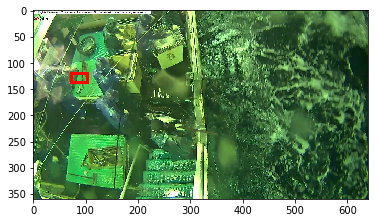

In [92]:
show_bb(0)

### Create & train model

Since we're not allowed (by the kaggle rules) to manually annotate the test set, we'll need to create a model that predicts the locations of the bounding box on each image. To do so, we create a model with multiple outputs: it will predict both the type of fish (the 'class'), and the 4 bounding box coordinates. We prefer this approach to only predicting the bounding box coordinates, since we hope that giving the model more context about what it's looking for will help it with both tasks.

In [93]:
p=0.6

In [94]:
inp = Input(conv_layers[-1].output_shape[1:])
x = MaxPooling2D()(inp)
x = BatchNormalization(axis=1)(x)
x = Dropout(p/4)(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(p)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(p/2)(x)
x_bb = Dense(4, name='bb')(x)
x_class = Dense(8, activation='softmax', name='class')(x)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


Since we have multiple outputs, we need to provide them to the model constructor in an array, and we also need to say what loss function to use for each. We also weight the bounding box loss function down by 1000x since the scale of the cross-entropy loss and the MSE is very different.

In [95]:
model = Model([inp], [x_bb, x_class])
model.compile(Adam(lr=0.001), loss=['mse', 'categorical_crossentropy'], metrics=['accuracy'],
             loss_weights=[.001, 1.])

In [96]:
model.fit(conv_feat, [trn_bbox, trn_labels], batch_size=batch_size, nb_epoch=3, 
             validation_data=(conv_val_feat, [val_bbox, val_labels]))

NameError: name 'conv_feat' is not defined

In [193]:
model.optimizer.lr = 1e-5

In [194]:
model.fit(conv_feat, [trn_bbox, trn_labels], batch_size=batch_size, nb_epoch=10, 
             validation_data=(conv_val_feat, [val_bbox, val_labels]))

Train on 3777 samples, validate on 537 samples
Epoch 1/10
3777/3777 [==============================] - 2s - loss: 0.0964 - bb_loss: 0.3385 - class_loss: 0.0961 - bb_acc: 0.2597 - class_acc: 0.9711 - val_loss: 0.0055 - val_bb_loss: 0.0536 - val_class_loss: 0.0055 - val_bb_acc: 0.2868 - val_class_acc: 0.9981
Epoch 2/10
3777/3777 [==============================] - 2s - loss: 0.0647 - bb_loss: 0.1931 - class_loss: 0.0645 - bb_acc: 0.2637 - class_acc: 0.9825 - val_loss: 0.0052 - val_bb_loss: 0.0218 - val_class_loss: 0.0052 - val_bb_acc: 0.3743 - val_class_acc: 0.9981
Epoch 3/10
3777/3777 [==============================] - 2s - loss: 0.0597 - bb_loss: 0.1092 - class_loss: 0.0596 - bb_acc: 0.2759 - class_acc: 0.9831 - val_loss: 0.0058 - val_bb_loss: 0.0127 - val_class_loss: 0.0058 - val_bb_acc: 0.3482 - val_class_acc: 0.9981
Epoch 4/10
3777/3777 [==============================] - 2s - loss: 0.0580 - bb_loss: 0.0580 - class_loss: 0.0579 - bb_acc: 0.2695 - class_acc: 0.9846 - val_loss: 5.7207e-

Excitingly, it turned out that the classification model is much improved by giving it this additional task. Let's see how well the bounding box model did by taking a look at its output.

In [195]:
pred = model.predict(conv_val_feat[0:10])

In [196]:
def show_bb_pred(i):
    bb = val_bbox[i]
    bb_pred = pred[0][i]
    plt.figure(figsize=(6,6))
    plot(val[i])
    ax=plt.gca()
    ax.add_patch(create_rect(bb_pred, 'yellow'))
    ax.add_patch(create_rect(bb))

The image shows that it can find fish that are tricky for us to see!

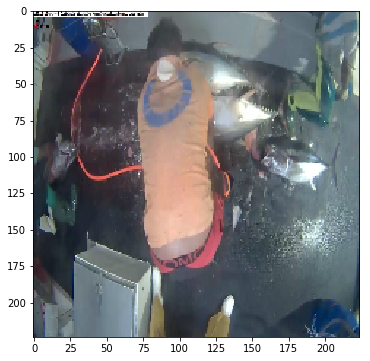

In [197]:
show_bb_pred(6)

In [198]:
model.evaluate(conv_val_feat, [val_bbox, val_labels])

512/537 [===========================>..] - ETA: 0s

[0.000531759554041093,
 7.241843400787114e-05,
 0.0005316871346261316,
 0.36685288590647874,
 1.0]

In [199]:
model.save_weights(path+'models/bn_anno.h5')

In [200]:
model.load_weights(path+'models/bn_anno.h5')

## Larger size

### Set up data

Let's see if we get better results if we use larger images. We'll use 640x360, since it's the same shape as the most common size we saw earlier (1280x720), without being too big.

In [4]:
!pwd

/home/ubuntu/Sansung


In [16]:
trn = get_data(path+'train', (360,640))
val = get_data(path+'valid', (360,640))

Found 3777 images belonging to 8 classes.
Found 537 images belonging to 8 classes.


The image shows that things are much clearer at this size.

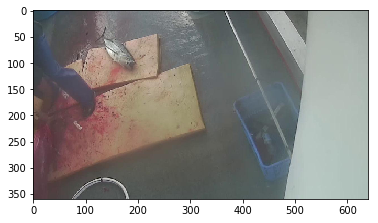

In [17]:
plot(trn[0])

In [18]:
test = get_data(path+'test', (360,640))

Found 3000 images belonging to 2 classes.


In [19]:
save_array(path+'results/trn_640.dat', trn)
save_array(path+'results/val_640.dat', val)

In [20]:
save_array(path+'results/test_640.dat', test)

In [21]:
trn = load_array(path+'results/trn_640.dat')
val = load_array(path+'results/val_640.dat')

We can now create our VGG model - we'll need to tell it we're not using the normal 224x224 images, which also means it won't include the fully connected layers (since they don't make sense for non-default sizes). We will also remove the last max pooling layer, since we don't want to throw away information yet.

In [22]:
vgg640 = Vgg16BN((360, 640)).model
vgg640.pop()
vgg640.input_shape, vgg640.output_shape
vgg640.compile(Adam(), 'categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor







Instructions for updating:
keep_dims is deprecated, use keepdims instead



We can now pre-compute the output of the convolutional part of VGG.

In [23]:
conv_val_feat = vgg640.predict(val, batch_size=32, verbose=1)
conv_trn_feat = vgg640.predict(trn, batch_size=32, verbose=1)

3777/3777 [==============================] - 179s   


In [24]:
save_array(path+'results/conv_val_640.dat', conv_val_feat)
save_array(path+'results/conv_trn_640.dat', conv_trn_feat)

In [25]:
conv_test_feat = vgg640.predict(test, batch_size=32, verbose=1)

3000/3000 [==============================] - 148s   


In [26]:
save_array(path+'results/conv_test_640.dat', conv_test_feat)

In [27]:
conv_val_feat = load_array(path+'results/conv_val_640.dat')
conv_trn_feat = load_array(path+'results/conv_trn_640.dat')

In [28]:
conv_test_feat = load_array(path+'results/conv_test_640.dat')

### Fully convolutional net (FCN)

Since we're using a larger input, the output of the final convolutional layer is also larger. So we probably don't want to put a dense layer there - that would be a *lot* of parameters! Instead, let's use a fully convolutional net (FCN); this also has the benefit that they tend to generalize well, and also seems like a good fit for our problem (since the fish are a small part of the image).

In [30]:
conv_layers,_ = split_at(vgg640, Convolution2D)

I'm not using any dropout, since I found I got better results without it.

In [31]:
nf=128; p=0.

In [32]:
def get_lrg_layers():
    return [
        BatchNormalization(axis=1, input_shape=conv_layers[-1].output_shape[1:]),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D((1,2)),
        Convolution2D(8,3,3, border_mode='same'),
        Dropout(p),
        GlobalAveragePooling2D(),
        Activation('softmax')
    ]

In [33]:
lrg_model = Sequential(get_lrg_layers())

In [34]:
lrg_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_1 (BatchNorma (None, 512, 22, 40)   2048        batchnormalization_input_1[0][0] 
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 128, 22, 40)   589952      batchnormalization_1[0][0]       
____________________________________________________________________________________________________
batchnormalization_2 (BatchNorma (None, 128, 22, 40)   512         convolution2d_14[0][0]           
____________________________________________________________________________________________________
maxpooling2d_6 (MaxPooling2D)    (None, 128, 11, 20)   0           batchnormalization_2[0][0]       
___________________________________________________________________________________________

In [35]:
lrg_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=batch_size, nb_epoch=2, 
             validation_data=(conv_val_feat, val_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3777 samples, validate on 537 samples
Epoch 1/2
3777/3777 [==============================] - 18s - loss: 0.6080 - acc: 0.8020 - val_loss: 1.5008 - val_acc: 0.6350
Epoch 2/2
3777/3777 [==============================] - 15s - loss: 0.1015 - acc: 0.9746 - val_loss: 0.1562 - val_acc: 0.9553


In [37]:
lrg_model.optimizer.lr=1e-5

In [38]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=batch_size, nb_epoch=6, 
             validation_data=(conv_val_feat, val_labels))

Train on 3777 samples, validate on 537 samples
Epoch 1/6
3777/3777 [==============================] - 15s - loss: 0.0958 - acc: 0.9775 - val_loss: 0.1121 - val_acc: 0.9702
Epoch 2/6
3777/3777 [==============================] - 15s - loss: 0.0623 - acc: 0.9849 - val_loss: 0.0260 - val_acc: 0.9981
Epoch 3/6
3777/3777 [==============================] - 15s - loss: 0.0403 - acc: 0.9886 - val_loss: 0.0403 - val_acc: 0.9926
Epoch 4/6
3777/3777 [==============================] - 15s - loss: 0.0492 - acc: 0.9886 - val_loss: 0.0753 - val_acc: 0.9721
Epoch 5/6
3777/3777 [==============================] - 15s - loss: 0.0356 - acc: 0.9886 - val_loss: 0.0309 - val_acc: 0.9907
Epoch 6/6
3777/3777 [==============================] - 15s - loss: 0.0139 - acc: 0.9952 - val_loss: 0.0172 - val_acc: 0.9944


When I submitted the results of this model to Kaggle, I got the best single model results of any shown here (ranked 22nd on the leaderboard as at Dec-6-2016.)

In [39]:
lrg_model.save_weights(path+'models/lrg_nmp.h5')

In [40]:
lrg_model.load_weights(path+'models/lrg_nmp.h5')

In [41]:
lrg_model.evaluate(conv_val_feat, val_labels)

537/537 [==============================] - 1s     


[0.017236673002160766, 0.994413407821229]

Another benefit of this kind of model is that the last convolutional layer has to learn to classify each part of the image (since there's only an average pooling layer after). Let's create a function that grabs the output of this layer (which is the 4th-last layer of our model).

In [42]:
l = lrg_model.layers
conv_fn = K.function([l[0].input, K.learning_phase()], l[-4].output)

TypeError: `outputs` of a TensorFlow backend function should be a list or tuple.

In [ ]:
def get_cm(inp, label):
    conv = conv_fn([inp,0])[0, label]
    return scipy.misc.imresize(conv, (360,640), interp='nearest')

We have to add an extra dimension to our input since the CNN expects a 'batch' (even if it's just a batch of one).

In [ ]:
inp = np.expand_dims(conv_val_feat[0], 0)
np.round(lrg_model.predict(inp)[0],2)

In [ ]:
plt.imshow(to_plot(val[0]))

In [ ]:
cm = get_cm(inp, 0)

The heatmap shows that (at very low resolution) the model is finding the fish!

In [ ]:
plt.imshow(cm, cmap="cool")

### All convolutional net heatmap

To create a higher resolution heatmap, we'll remove all the max pooling layers, and repeat the previous steps.

In [ ]:
def get_lrg_layers():
    return [
        BatchNormalization(axis=1, input_shape=conv_layers[-1].output_shape[1:]),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        Convolution2D(8,3,3, border_mode='same'),
        GlobalAveragePooling2D(),
        Activation('softmax')
    ]

In [ ]:
lrg_model = Sequential(get_lrg_layers())

In [ ]:
lrg_model.summary()

In [ ]:
lrg_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=batch_size, nb_epoch=2, 
             validation_data=(conv_val_feat, val_labels))

In [ ]:
lrg_model.optimizer.lr=1e-5

In [ ]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=batch_size, nb_epoch=6, 
             validation_data=(conv_val_feat, val_labels))

In [ ]:
lrg_model.save_weights(path+'models/lrg_0mp.h5')

In [ ]:
lrg_model.load_weights(path+'models/lrg_0mp.h5')

#### Create heatmap

In [ ]:
l = lrg_model.layers
conv_fn = K.function([l[0].input, K.learning_phase()], l[-3].output)

In [ ]:
def get_cm2(inp, label):
    conv = conv_fn([inp,0])[0, label]
    return scipy.misc.imresize(conv, (360,640))

In [ ]:
inp = np.expand_dims(conv_val_feat[0], 0)

In [ ]:
plt.imshow(to_plot(val[0]))

In [ ]:
cm = get_cm2(inp, 0)

In [ ]:
cm = get_cm2(inp, 4)

In [ ]:
plt.imshow(cm, cmap="cool")

In [ ]:
plt.figure(figsize=(10,10))
plot(val[0])
plt.imshow(cm, cmap="cool", alpha=0.5)

### Inception mini-net

Here's an example of how to create and use "inception blocks" - as you see, they use multiple different convolution filter sizes and concatenate the results together. We'll talk more about these next year.

In [ ]:
def conv2d_bn(x, nb_filter, nb_row, nb_col, subsample=(1, 1)):
    x = Convolution2D(nb_filter, nb_row, nb_col,
                      subsample=subsample, activation='relu', border_mode='same')(x)
    return BatchNormalization(axis=1)(x)

In [ ]:
def incep_block(x):
    branch1x1 = conv2d_bn(x, 32, 1, 1, subsample=(2, 2))
    branch5x5 = conv2d_bn(x, 24, 1, 1)
    branch5x5 = conv2d_bn(branch5x5, 32, 5, 5, subsample=(2, 2))

    branch3x3dbl = conv2d_bn(x, 32, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 48, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 48, 3, 3, subsample=(2, 2))

    branch_pool = AveragePooling2D(
        (3, 3), strides=(2, 2), border_mode='same')(x)
    branch_pool = conv2d_bn(branch_pool, 16, 1, 1)
    return merge([branch1x1, branch5x5, branch3x3dbl, branch_pool],
              mode='concat', concat_axis=1)

In [ ]:
inp = Input(vgg640.layers[-1].output_shape[1:]) 
x = BatchNormalization(axis=1)(inp)
x = incep_block(x)
x = incep_block(x)
x = incep_block(x)
x = Dropout(0.75)(x)
x = Convolution2D(8,3,3, border_mode='same')(x)
x = GlobalAveragePooling2D()(x)
outp = Activation('softmax')(x)

In [ ]:
lrg_model = Model([inp], outp)

In [ ]:
lrg_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=batch_size, nb_epoch=2, 
             validation_data=(conv_val_feat, val_labels))

In [ ]:
lrg_model.optimizer.lr=1e-5

In [ ]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=batch_size, nb_epoch=6, 
             validation_data=(conv_val_feat, val_labels))

In [ ]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=batch_size, nb_epoch=10, 
             validation_data=(conv_val_feat, val_labels))

In [ ]:
lrg_model.save_weights(path+'models/lrg_nmp.h5')

In [ ]:
lrg_model.load_weights(path+'models/lrg_nmp.h5')

## Pseudo-labeling

In [ ]:
#preds = model.predict([conv_test_feat, test_sizes], batch_size=batch_size*2)
preds = lrg_model.predict(conv_test_feat, batch_size=batch_size*2)

In [ ]:
gen = image.ImageDataGenerator()

In [ ]:
test_batches = gen.flow(conv_test_feat, preds, batch_size=16)

In [ ]:
val_batches = gen.flow(conv_val_feat, val_labels, batch_size=4)

In [ ]:
batches = gen.flow(conv_feat, trn_labels, batch_size=44)

In [ ]:
mi = MixIterator([batches, test_batches, val_batches])

In [ ]:
bn_model.fit_generator(mi, mi.N, nb_epoch=8, validation_data=(conv_val_feat, val_labels))

## Submit

In [ ]:
def do_clip(arr, mx): return np.clip(arr, (1-mx)/7, mx)

In [ ]:
lrg_model.evaluate(conv_val_feat, val_labels, batch_size*2)

In [ ]:
preds = lrg_model.predict(conv_test_feat, batch_size=batch_size)

In [ ]:
preds = preds[1]

In [ ]:
test = load_array(path+'results/test_640.dat')

In [ ]:
test = load_array(path+'results/test.dat')

In [ ]:
preds = conv_model.predict(test, batch_size=32)

In [ ]:
subm = do_clip(preds,0.82)

In [ ]:
subm_name = path+'results/subm_bb.gz'

In [ ]:
# classes = sorted(batches.class_indices, key=batches.class_indices.get)
classes = ['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']

In [ ]:
submission = pd.DataFrame(subm, columns=classes)
submission.insert(0, 'image', raw_test_filenames)
submission.head()

In [ ]:
submission.to_csv(subm_name, index=False, compression='gzip')

In [ ]:
FileLink(subm_name)